In [1]:
from fastai.basics import *
from fastai.vision.all import *
from fastai.callback.all import *
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
path = Path('C:/Users/light/Documents/Fastbook/Personal-Machine-Learning-Data/Fruit/')

In [3]:
item_tfms = RandomResizedCrop(460, min_scale=0.75, ratio=(1.,1.))
batch_tfms = [*aug_transforms(size=224, max_warp=0), Normalize.from_stats(*imagenet_stats)]
bs=256

In [4]:
fruits = DataBlock(blocks=(ImageBlock, CategoryBlock),
                   get_items=get_image_files,
                   splitter=RandomSplitter(),
                   get_y=parent_label,
                   item_tfms=item_tfms,
                   batch_tfms=batch_tfms)

In [5]:
dls = fruits.dataloaders(path, bs=bs)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


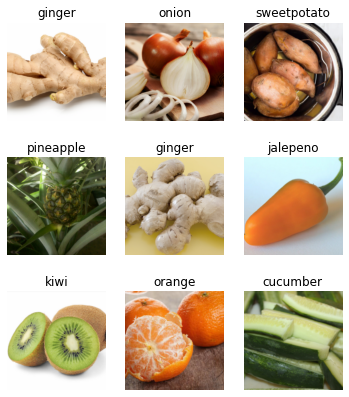

In [6]:
dls.show_batch(max_n=9, figsize=(6,7))

In [7]:
dls.vocab

['apple', 'banana', 'beetroot', 'bell pepper', 'cabbage', 'capsicum', 'carrot', 'cauliflower', 'chilli pepper', 'corn', 'cucumber', 'eggplant', 'garlic', 'ginger', 'grapes', 'jalepeno', 'kiwi', 'lemon', 'lettuce', 'mango', 'onion', 'orange', 'paprika', 'pear', 'peas', 'pineapple', 'pomegranate', 'potato', 'raddish', 'soy beans', 'spinach', 'sweetcorn', 'sweetpotato', 'tomato', 'turnip', 'watermelon']

In [8]:
dls.vocab.o2i

{'apple': 0,
 'banana': 1,
 'beetroot': 2,
 'bell pepper': 3,
 'cabbage': 4,
 'capsicum': 5,
 'carrot': 6,
 'cauliflower': 7,
 'chilli pepper': 8,
 'corn': 9,
 'cucumber': 10,
 'eggplant': 11,
 'garlic': 12,
 'ginger': 13,
 'grapes': 14,
 'jalepeno': 15,
 'kiwi': 16,
 'lemon': 17,
 'lettuce': 18,
 'mango': 19,
 'onion': 20,
 'orange': 21,
 'paprika': 22,
 'pear': 23,
 'peas': 24,
 'pineapple': 25,
 'pomegranate': 26,
 'potato': 27,
 'raddish': 28,
 'soy beans': 29,
 'spinach': 30,
 'sweetcorn': 31,
 'sweetpotato': 32,
 'tomato': 33,
 'turnip': 34,
 'watermelon': 35}

In [9]:
learn = cnn_learner(dls, resnet34, pretrained=True, metrics=[error_rate, accuracy]).to_fp16()

In [10]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,4.549261,2.117666,0.565268,0.434732,03:29
1,3.067572,0.926686,0.270396,0.729604,03:12
2,2.279689,0.768730,0.235431,0.764569,03:08
3,1.833282,0.757038,0.227273,0.772727,03:07


In [9]:
data_path = 'C:/Users/light/Documents/Fastbook/Personal-Machine-Learning-Data/'
learn.save(data_path + 'stage_1')

In [12]:
interp = ClassificationInterpretation.from_learner(learn)
losses,idxs = interp.top_losses()

len(dls.valid_ds) == len(losses) == len(idxs)

True

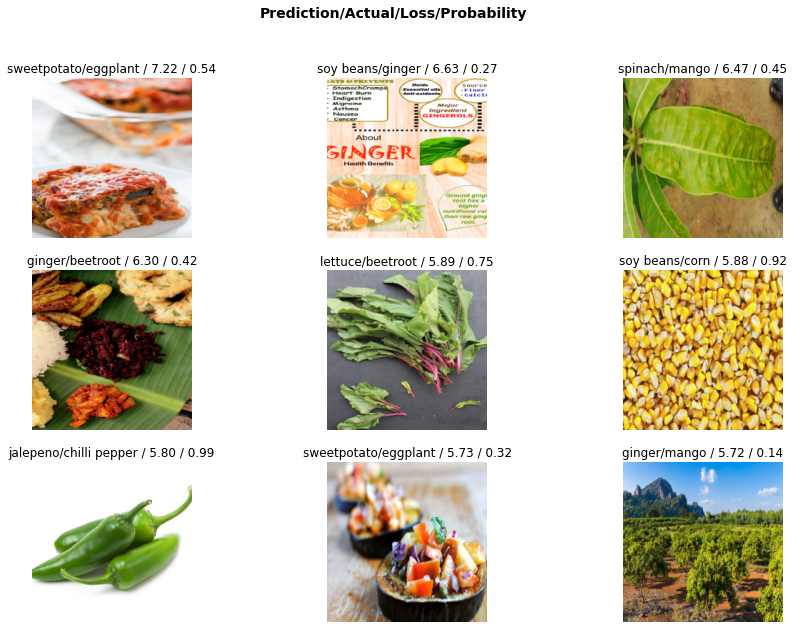

In [13]:
interp.plot_top_losses(9, figsize=(15,10))

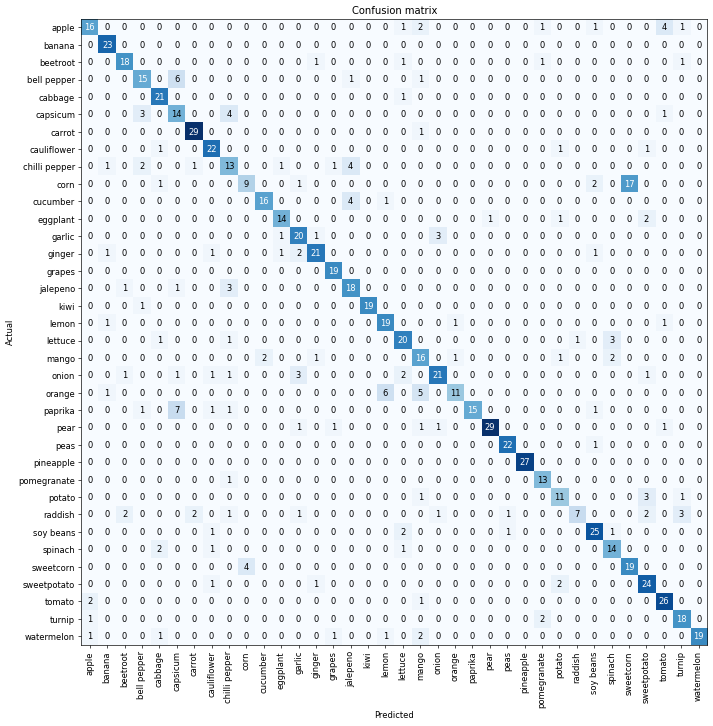

In [14]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [15]:
interp.most_confused(min_val=3)

[('corn', 'sweetcorn', 17),
 ('paprika', 'capsicum', 7),
 ('bell pepper', 'capsicum', 6),
 ('orange', 'lemon', 6),
 ('orange', 'mango', 5),
 ('apple', 'tomato', 4),
 ('capsicum', 'chilli pepper', 4),
 ('chilli pepper', 'jalepeno', 4),
 ('cucumber', 'jalepeno', 4),
 ('sweetcorn', 'corn', 4),
 ('capsicum', 'bell pepper', 3),
 ('garlic', 'onion', 3),
 ('jalepeno', 'chilli pepper', 3),
 ('lettuce', 'spinach', 3),
 ('onion', 'garlic', 3),
 ('potato', 'sweetpotato', 3),
 ('raddish', 'turnip', 3)]

In [16]:
learn.load(data_path + 'stage_1');

In [17]:
learn.unfreeze()

In [18]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.989439,1.375531,0.389277,0.610723,03:11
1,0.916052,1.670713,0.391608,0.608392,03:12
2,0.783867,0.890686,0.259907,0.740093,03:08
3,0.648709,0.629413,0.194639,0.805361,03:09


In [19]:
learn.load(data_path + 'stage_1');

SuggestedLRs(valley=9.120108734350652e-05)

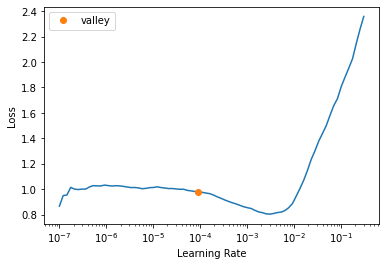

In [20]:
learn.lr_find()

In [21]:
learn.unfreeze()
learn.fit_one_cycle(4, lr_max=slice(1e-6, 1e-3))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.013376,0.666540,0.196970,0.803030,03:09
1,0.877827,0.583022,0.179487,0.820513,03:09
2,0.751381,0.558223,0.174825,0.825175,03:07
3,0.667388,0.553671,0.173660,0.826340,03:05


In [22]:
learn.save(data_path + 'stage_2');

In [4]:
fruits = DataBlock(blocks=(ImageBlock, CategoryBlock),
                   get_items=get_image_files,
                   splitter=RandomSplitter(),
                   get_y=parent_label,
                   item_tfms=item_tfms,
                   batch_tfms=batch_tfms)
dls = fruits.dataloaders(path, bs=32)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


In [5]:
learn = cnn_learner(dls, resnet50, pretrained=True, metrics=[error_rate, accuracy])

SuggestedLRs(valley=0.0004786300996784121)

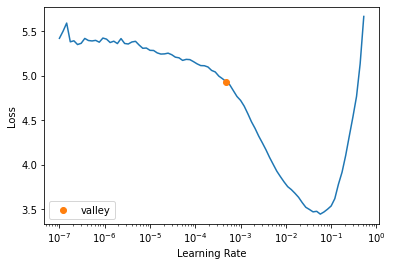

In [6]:
learn.lr_find()

In [ ]:
learn.fit_one_cycle(5)

In [27]:
learn.save(data_path + 'resnet50_1');

SuggestedLRs(valley=3.981071586167673e-06)

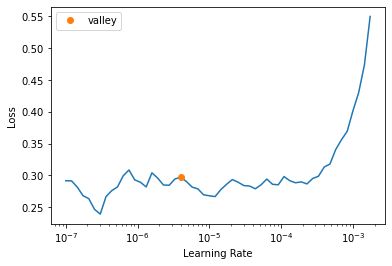

In [28]:
learn.load(data_path + 'resnet50_1');
learn.unfreeze()
learn.lr_find()

In [7]:
learn.fit_one_cycle(2)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.613338,0.812996,0.226107,0.773893,03:16
1,0.867332,0.636270,0.170163,0.829837,03:22


In [10]:
learn.save(data_path + 'resnet50_2')

Path('C:/Users/light/Documents/Fastbook/Personal-Machine-Learning-Data/resnet50_2.pth')